In [5]:
from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation
from collections import deque


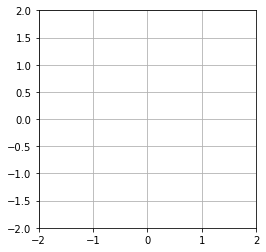

In [6]:
G = 9.8  # acceleration due to gravity, in m/s^2
L1 = 1.0  # length of pendulum 1 in m
  # length of pendulum 2 in m
L = L1 + L1  # maximal length of the combined pendulum
history_len = 500  # how many trajectory points to display

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(autoscale_on=False, xlim=(-L, L), ylim=(-L, L))
ax.set_aspect('equal')
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
trace, = ax.plot([], [], '.-', lw=1, ms=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
history_x, history_y = deque(maxlen=history_len), deque(maxlen=history_len)

dt = 10 / len(x1)

def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]

    if i == 0:
        history_x.clear()
        history_y.clear()

    history_x.appendleft(thisx[2])
    history_y.appendleft(thisy[2])

    line.set_data(thisx, thisy)
    trace.set_data(history_x, history_y)
    time_text.set_text(time_template % (i*dt))
    return line, trace, time_text


In [7]:
data = []
with open('output.txt', 'r') as f:
    data = f.readlines()
    data = [line.rstrip().split() for line in data]

In [8]:
import pandas as pd

df = pd.DataFrame(data)
_x1 = 0
_y1 = 1
_x2 = 2
_y2 = 3
_t = 4
_theta1 = 5
_theta2 = 6
df.head()

,0,1,2,3,4,5,6
0,1.000000,-0.000000,2.000000,-0.000000,0.000000,0.000000,0.000000
1,0.999509,-0.031348,1.999509,-0.031359,0.080000,-0.783391,-0.001026
2,0.992199,-0.124663,1.992199,-0.125435,0.160000,-1.551046,-0.029052
3,0.961785,-0.273807,1.961749,-0.282200,0.240000,-2.235366,-0.200371
4,0.888140,-0.459573,1.887274,-0.501186,0.320000,-2.730048,-0.695030


In [9]:
len(df[_x1])

251

In [10]:
x1 = df[_x1].to_numpy().astype(float)
y1 = df[_y1].to_numpy().astype(float)
x2 = df[_x2].to_numpy().astype(float)
y2 = df[_y2].to_numpy().astype(float)
t = df[_t].to_numpy().astype(float)
theta1 = df[_theta1].to_numpy().astype(float)
theta2 = df[_theta2].to_numpy().astype(float)
history_x, history_y = deque(maxlen=history_len), deque(maxlen=history_len)

In [93]:
ani = animation.FuncAnimation(
    fig, animate, len(x1), interval=dt*1000, blit=True)
plt.show()

ani.save('test-f90.gif')

MovieWriter ffmpeg unavailable; using Pillow instead.


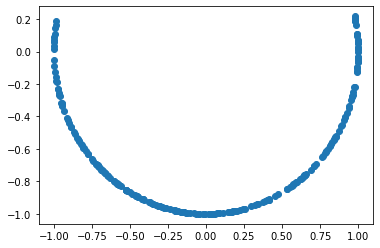

In [11]:
plt.scatter(x1, y1)

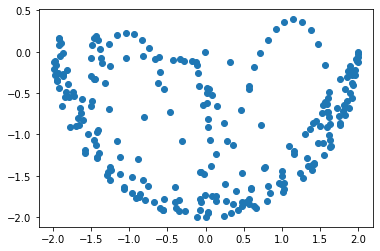

In [17]:
plt.scatter(x2, y2)
plt.savefig("bob2.png", bbox_inches='tight')

In [14]:
plt.savefig("test.png")

<Figure size 432x288 with 0 Axes>